In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import glob
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time

In [1]:
import pandas as pd
pd.read_csv('DataFinalBeta.csv')

,Unnamed: 0,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
0,0,1/10/2019,6:00,0.26,8.98,11.66
1,1,1/10/2019,6:05,0.85,16.87,11.72
2,2,1/10/2019,6:10,1.78,28.75,11.80
3,3,1/10/2019,6:15,2.17,33.24,11.92
4,4,1/10/2019,6:20,2.12,32.35,12.12
...,...,...,...,...,...,...
65947,4459,31/12/2020,17:35,0.12,9.11,12.93
65948,4460,31/12/2020,17:40,0.11,8.69,12.66
65949,4461,31/12/2020,17:45,0.10,7.89,12.54
65950,4462,31/12/2020,17:50,0.02,5.31,12.50


In [14]:
abril = pd.read_csv('Enero 2020.csv').drop('Unnamed: 0',axis = 1)
mayo = pd.read_csv('Mayo 2020.csv').drop('Unnamed: 0',axis = 1)
abril = abril[['Fecha','Hora','Potencia [kW]','Insolacion [W/m2]','Temperatura de modulos [C]']]
mayo = mayo[['Fecha','Hora','Potencia [kW]','Insolacion [W/m2]','Temperatura de modulos [C]']]
abril.head()

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C]
0,1/01/2020,6:00,0.00,1.69,9.39
1,1/01/2020,6:05,0.01,3.49,9.46
2,1/01/2020,6:10,0.11,6.20,9.47
3,1/01/2020,6:15,0.26,9.08,9.55
4,1/01/2020,6:20,0.41,11.50,9.56


In [3]:
mayo.head()

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C]
0,1/05/2020,6:00,0.00,2.51,11.78
1,1/05/2020,6:05,0.00,3.58,11.89
2,1/05/2020,6:10,0.01,4.80,11.83
3,1/05/2020,6:15,0.06,6.13,12.01
4,1/05/2020,6:20,0.11,7.46,12.10


In [4]:
# Reemplazo de los valores de potencia iguales a 0.00
horas = ['6:00',
 '6:05',
 '6:10',
 '6:15',
 '6:20',
 '6:25',
 '6:30',
 '6:35',
 '6:40',
 '6:45',
 '6:50',
 '6:55',
 '17:00',
 '17:05',
 '17:10',
 '17:15',
 '17:20',
 '17:25',
 '17:30',
 '17:35',
 '17:40',
 '17:45',
 '17:50',
 '17:55']

for h in horas:
        abril = abril[abril.Hora!= h]
        mayo = mayo[mayo.Hora!=h]
abril.set_index(np.array(range(3600)),inplace = True)
mayo.set_index(np.array(range(len(mayo))),inplace = True)
abril[0:120]

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C]
0,1/04/2020,7:00,2.29,45.58,13.31
1,1/04/2020,7:05,2.78,53.34,13.45
2,1/04/2020,7:10,4.18,75.21,14.06
3,1/04/2020,7:15,5.82,100.84,15.09
4,1/04/2020,7:20,5.98,100.88,16.30
...,...,...,...,...,...
115,1/04/2020,16:35,7.21,115.75,22.17
116,1/04/2020,16:40,7.49,116.51,22.04
117,1/04/2020,16:45,7.24,109.65,21.73
118,1/04/2020,16:50,6.47,101.01,21.17


In [5]:
mayo.head(120)

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C]
0,1/05/2020,7:00,0.31,11.46,12.19
1,1/05/2020,7:05,0.46,14.47,12.36
2,1/05/2020,7:10,0.56,16.11,12.10
3,1/05/2020,7:15,0.71,18.63,12.18
4,1/05/2020,7:20,0.72,18.77,12.12
...,...,...,...,...,...
115,1/05/2020,16:35,6.70,90.24,18.59
116,1/05/2020,16:40,4.91,70.87,18.46
117,1/05/2020,16:45,3.84,54.36,17.92
118,1/05/2020,16:50,3.62,53.57,17.40


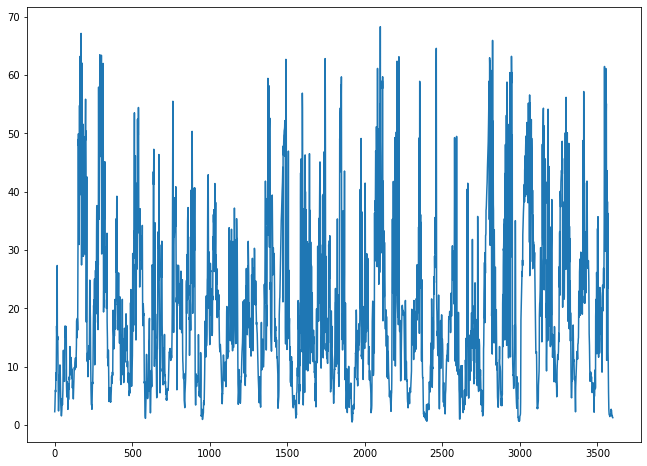

In [6]:
abril['Potencia [kW]'].plot(figsize = (11,8))

### Función de auto correlación y de autocorrelación parcial

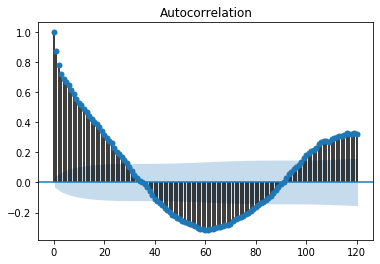

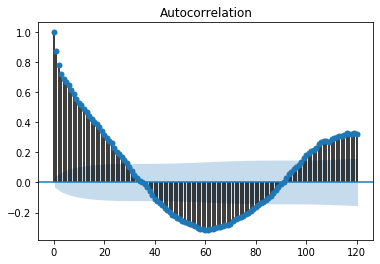

In [7]:
plot_acf(abril['Potencia [kW]'], lags =120)

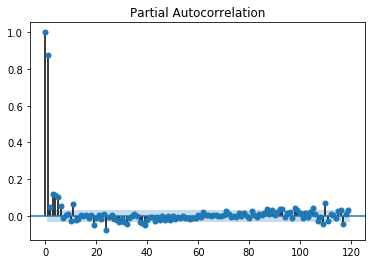

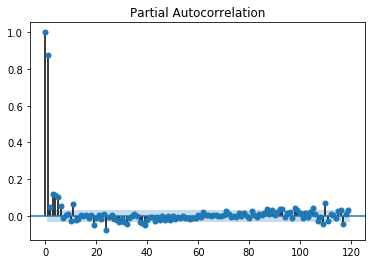

In [8]:
plot_pacf(abril['Potencia [kW]'], lags = np.arange(120))

### Se observa que los datos a tratar son no estacionarios, se procede a realizar la conversión a datos estacionarios

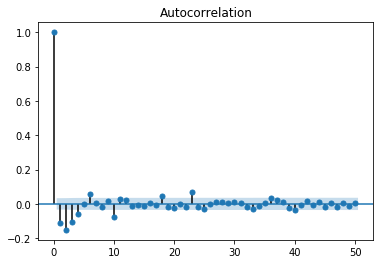

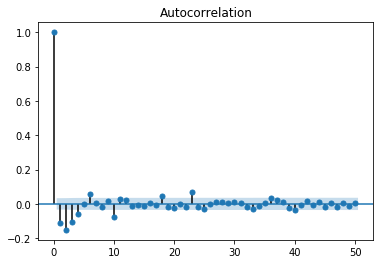

In [9]:
first_diff = abril['Potencia [kW]'].diff()
plot_acf(first_diff[121:], lags = 50)

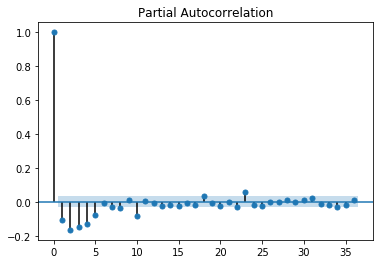

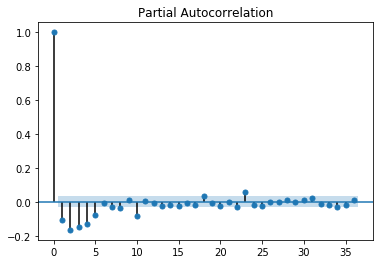

In [10]:
plot_pacf(first_diff[1:])

## Entrenamiento del modelo SARIMAX

#### Datos de entrenamiento y de prueba

In [18]:
train_data = abril['Potencia [kW]'][0:2736]
test_data = abril['Potencia [kW]'][2736:2879]

In [31]:
abril[abril.Fecha == '20/01/2020']

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C]
2736,20/01/2020,6:00,0.00,1.32,12.18
2737,20/01/2020,6:05,0.02,4.07,12.17
2738,20/01/2020,6:10,0.24,8.94,12.34
2739,20/01/2020,6:15,0.40,11.41,12.55
2740,20/01/2020,6:20,0.52,13.83,12.82
...,...,...,...,...,...
2875,20/01/2020,17:35,0.95,21.18,18.02
2876,20/01/2020,17:40,0.66,16.04,17.68
2877,20/01/2020,17:45,0.35,11.46,17.48
2878,20/01/2020,17:50,0.10,6.70,17.36


#### Pruebas 

Se realiza el ajuste de diferentes modelos fijando un valor para el parámetro SAR y SMA y realizando la prueba de estos con diferentes valores de AR y MA.

In [20]:
my_order = (1,1,1)
my_seasonal_order = (0, 1, 0, 120)

model = SARIMAX(abril['Potencia [kW]'], order = my_order, seasonal_order=my_seasonal_order)

In [21]:
# Ajuste del modelo
start = time()
model_fit = model.fit(disp = True)
end = time()
print('Tiempo de ajuste del modelo: ',end-start)

Tiempo de ajuste del modelo:  449.2432131767273


In [22]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                        Potencia [kW]   No. Observations:                 4464
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 120)   Log Likelihood              -16063.755
Date:                              Mon, 25 Jan 2021   AIC                          32133.510
Time:                                      10:50:37   BIC                          32152.639
Sample:                                           0   HQIC                         32140.263
                                             - 4464                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5762      0.023     25.290      0.000       0.532       0.621
ma.L1         -0.79

In [23]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

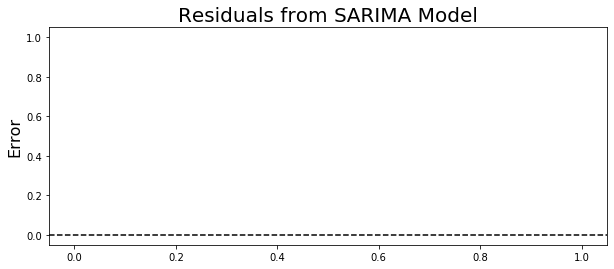

In [24]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(mayo['Potencia [kW]'][0:120])
plt.figure()
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [11]:
ene = pd.read_csv('Enero 2020.csv')
ene.set_index('Hora',inplace = True)

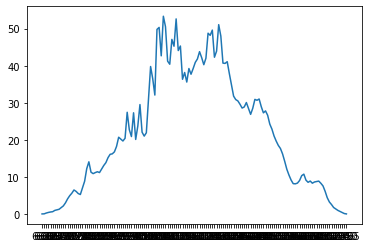

In [32]:
ene20 = ene[ene.Fecha == '20/01/2020']['Potencia [kW]']
plt.plot(ene20)

In [51]:
import random
man = []
for i in range(len(ene20)):
    n = random.randint(-4,4)
    if ene20[i]+ n < 0:
        man.append(ene20[i])
    else:
        man.append(ene20[i]+n)

Text(0, 0.5, 'Potencia [kW]')

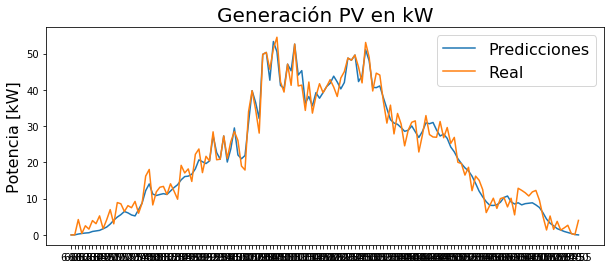

In [53]:
plt.figure(figsize=(10,4))

plt.plot(ene20)
plt.plot(man)

plt.legend(('Predicciones', 'Real'), fontsize=16)

plt.title('Generación PV en kW', fontsize=20)
plt.ylabel('Potencia [kW]', fontsize=16)